In [103]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ProjectFunctions as pf

## Variable initialization

In [140]:
G = 6.67408E-11

# position
posSun = np.array([0,0,0]) #m
posEarth = np.array([7.251E7,1.181E8,5.119E7])*1000 #m
posMoon = np.array([7.244E7,1.185E8,5.137E7])*1000 #m

# velocity
vSun = np.array([0,0,0]) #m/s
vEarth = np.array([-2.6E4,1.3E4,5.76E3]) #m/s
vMoon = np.array([-2.74E4,1.31E4,5.76E3]) #m/s

# mass
mE = 5.972E24 #kg
mS = 1.989E30 #kg
mM = 7.347E22 #kg

names = ['Sun', 'Earth', 'Moon']

### Simulation variables

In [218]:
dayConsistency = 60

iterTime = 365*dayConsistency*2
h = 84000/dayConsistency
t = np.arange(0,iterTime,1)

## 2 Object Testing

In [78]:
# position
posArray = np.array([posSun,posEarth]).T

# velocity
vArray = np.array([vSun,vEarth]).T

# mass
massArray = np.array([[mS,mE]]).T

#acceleration 
accArray = pf.fofGrav(1,posArray, massArray)
accArray[1]

array([-0.00298518, -0.00486209, -0.00210745])

In [35]:
v = np.zeros((iterTime,3,2))
r = np.zeros((iterTime,3,2))
a = np.zeros((iterTime,3,2))

v[0] = vArray
r[0] = posArray
a[0] = np.hstack((np.array([[0],[0],[0]]),np.reshape(accArray[1],(3,1))))

In [36]:
for i in range(0,len(t)-1):
    v[i+1] = v[i] + h * a[i]
    r[i+1] = r[i] + h * v[i]
    
    #Get accelerations
    tempAccel = pf.fofGrav(0,r[i],massArray)[1]

    for k in range(posArray.shape[1]-1):
        tempAccel = np.vstack((tempAccel, pf.fofGrav(k+1,r[i],massArray)[1]))

    a[i+1] = tempAccel.T

Text(0.5, 0.874, 'Testing Eulers Method')

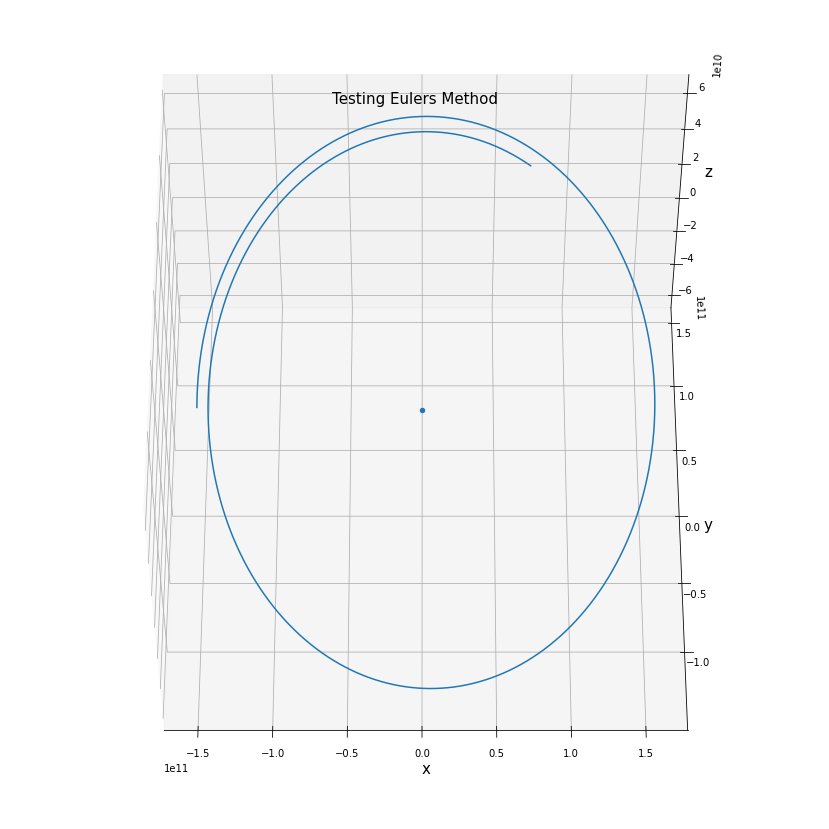

In [37]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

# plot orbit
xPlot = r[:,0,1]
yPlot = r[:,1,1]
zPlot = r[:,2,1]

ax.plot(xPlot, yPlot, zPlot)

# plot spherical wireframe (of the radius of the orbit)
# u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
# rEarth = eucDist(np.array([[0],[0],[0]]), np.reshape(r[0,:,1],(3,1)))

# x = rEarth*np.cos(u)*np.sin(v)
# y = rEarth*np.sin(u)*np.sin(v)
# z = rEarth*np.cos(v)

# ax.plot_wireframe(x, y, z, color="r")

# plot the position of the sun
xPlot = r[0,0,0]
yPlot = r[0,1,0]
zPlot = r[0,2,0]

ax.scatter(xPlot, yPlot, zPlot)

ax.view_init(elev=55, azim=-90) #Change view parameters (spin along the azimuth)

ax.set_xlabel('x', fontsize = 15) #Assign label
ax.set_ylabel('y', fontsize = 15) #Assign label
ax.set_zlabel('z', fontsize = 15) #Assign label

ax.set_title('Testing Eulers Method', y=0.95, fontsize=15)

## 3 Object Testing

In [219]:
# position
posArray = np.array([posSun,posEarth,posMoon]).T

# velocity
vArray = np.array([vSun,vEarth,vMoon]).T

# mass
massArray = np.array([[mS,mE,mM]]).T

#acceleration 
accArray = pf.fofGrav(0,posArray,massArray)[1]

for i in range(len(posArray)-1):
    accArray = np.vstack((accArray, pf.fofGrav(i+1,posArray,massArray)[1]))

accArray = accArray.T

In [220]:
# print('Positions:\n',posArray,'\n')
# print('Mass:\n',massArray,'\n')
# print('Accelerations:\n',accArray)

In [221]:
nObjects = posArray.shape

v = np.zeros((iterTime,3,nObjects[1]))
r = np.zeros((iterTime,3,nObjects[1]))
a = np.zeros((iterTime,3,nObjects[1]))

v[0] = vArray
r[0] = posArray
a[0] = accArray

In [222]:
for i in range(0,len(t)-1):
    v[i+1] = v[i] + h * a[i]
    r[i+1] = r[i] + h * v[i]
    
    #Get accelerations
    tempAccel = pf.fofGrav(0,r[i],massArray)[1]

    for k in range(posArray.shape[1]-1):
        tempAccel = np.vstack((tempAccel, pf.fofGrav(k+1,r[i],massArray)[1]))

    a[i+1] = tempAccel.T

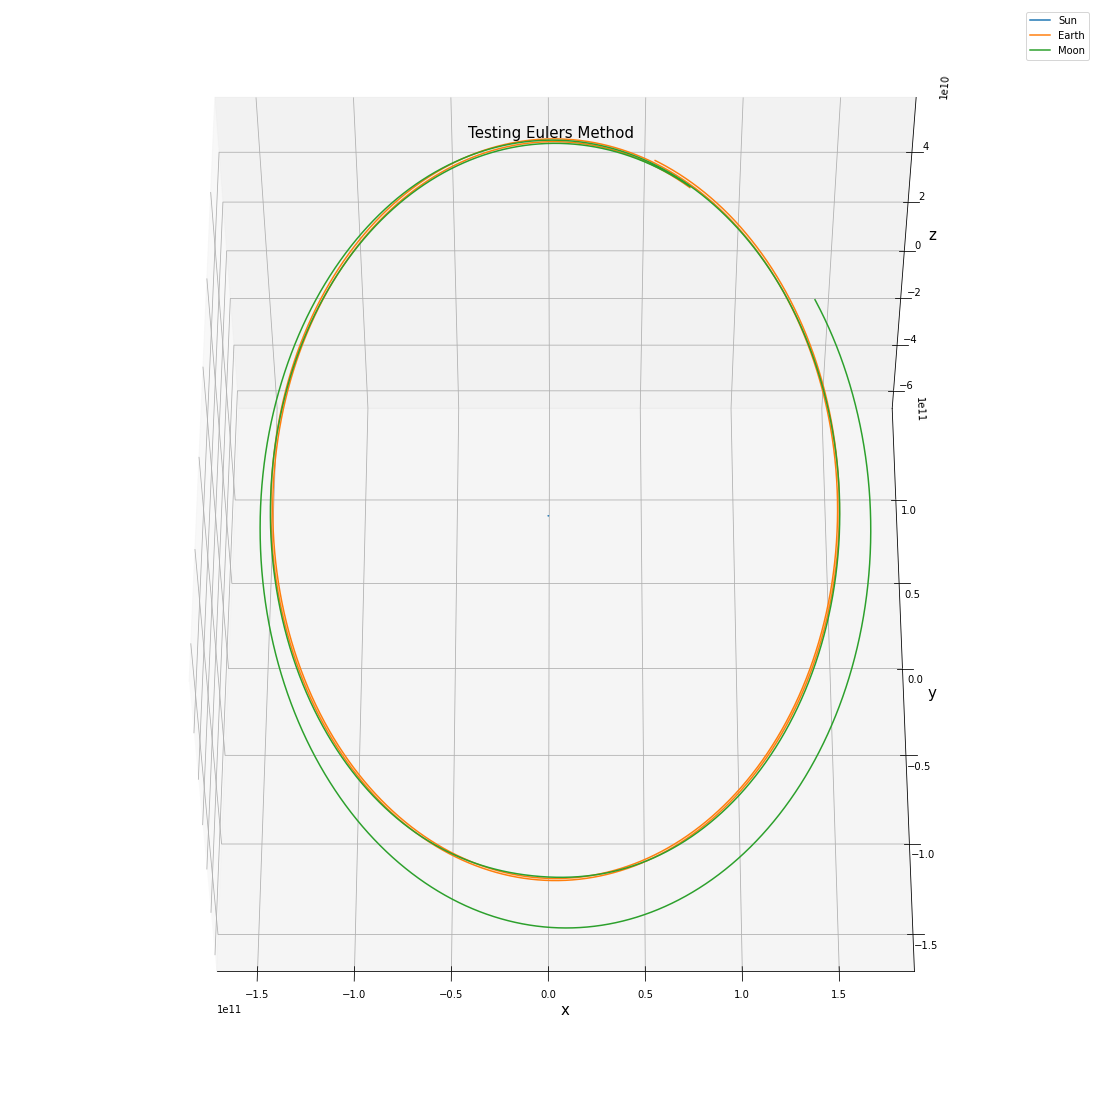

In [223]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')

for i in range(r[0].shape[1]):
    xPlot = r[:,0,i]
    yPlot = r[:,1,i]
    zPlot = r[:,2,i]

    ax.plot(xPlot, yPlot, zPlot, label = names[i])

# plot spherical wireframe (of the radius of the orbit)
# u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
# rEarth = eucDist(np.array([[0],[0],[0]]), np.reshape(r[0,:,1],(3,1)))

# x = rEarth*np.cos(u)*np.sin(v)
# y = rEarth*np.sin(u)*np.sin(v)
# z = rEarth*np.cos(v)

# ax.plot_wireframe(x, y, z, color="r")

ax.view_init(elev=55, azim=-90) #Change view parameters (spin along the azimuth)

ax.set_xlabel('x', fontsize = 15) #Assign label
ax.set_ylabel('y', fontsize = 15) #Assign label
ax.set_zlabel('z', fontsize = 15) #Assign label

ax.set_title('Testing Eulers Method', y=0.95, fontsize=15)

ax.legend()

In [196]:
pf.eucDist(r[:,:,0],r[:,:,1])

array([1.27091141e+13, 1.17098339e+13, 5.10141755e+12])